In [1]:
import keras
import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import array_to_img, img_to_array, list_pictures, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("data_all.csv")
# df.head()

x, t = [], []

for (i, row) in df.iterrows():
    filepath = row['filepath']
    tmp_img = load_img(filepath, target_size=(32,32))
    img = img_to_array(tmp_img) / 255.0 # -> float32 + 正規化
    
    # データに追加
    x.append(img)
    t.append(row['label'])
    
# numpyに変換
x = np.array(x, 'f')

# x.shape

# クラスの形式を変換 <- one-hot表現
t = np_utils.to_categorical(t, 2)

# 学習用データとテストデータ
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.33, random_state=1)



Using TensorFlow backend.


Train on 824 samples, validate on 406 samples
Epoch 1/50
824/824 [==============================] - 6s 8ms/step - loss: 0.7543 - acc: 0.5740 - val_loss: 0.6495 - val_acc: 0.6305
Epoch 2/50
824/824 [==============================] - 9s 11ms/step - loss: 0.6442 - acc: 0.6420 - val_loss: 0.6443 - val_acc: 0.6133
Epoch 3/50
824/824 [==============================] - 10s 12ms/step - loss: 0.6051 - acc: 0.6578 - val_loss: 0.6354 - val_acc: 0.6527
Epoch 4/50
824/824 [==============================] - 10s 12ms/step - loss: 0.5825 - acc: 0.6833 - val_loss: 0.6371 - val_acc: 0.6453
Epoch 5/50
824/824 [==============================] - 8s 10ms/step - loss: 0.5625 - acc: 0.7197 - val_loss: 0.6510 - val_acc: 0.6675
Epoch 6/50
824/824 [==============================] - 8s 9ms/step - loss: 0.4955 - acc: 0.7476 - val_loss: 0.6258 - val_acc: 0.6404
Epoch 7/50
824/824 [==============================] - 6s 8ms/step - loss: 0.4654 - acc: 0.7621 - val_loss: 0.7061 - val_acc: 0.6453
Epoch 8/50
824/824 [====

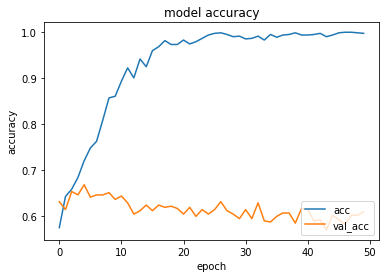

In [2]:
# CNNを構築
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))       # クラスは2個
model.add(Activation('softmax'))

# コンパイル
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

# 実行。出力はなしで設定(verbose=0)。
history = model.fit(x_train, t_train, batch_size=30, epochs=50,
                   validation_data = (x_test, t_test))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()